# <center> Bài tập Thực hành môn Xử lý Đa chiều </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

# <center> Trả lời </center>

## Bài 3. Tập dữ liệu 20newsgroups (trong sklearn.datasets.fetch_20newsgroups) được lấy từ 18846 bài thảo luận về 20 chủ đề khác nhau.

- a) Hãy đọc dữ liệu và xem danh sách các chủ đề trong dữ liệu.

In [114]:
from sklearn.datasets import fetch_20newsgroups

# Tải dữ liệu
newsgroups = fetch_20newsgroups(subset='all')
categories = newsgroups.target_names

# In danh sách các chủ đề
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

- b) Chọn 5 trong 20 chủ đề để lấy dữ liệu. Tiền xử lý và vector hoá dữ liệu đã chọn.

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Chọn các chủ đề đã quyết định (2, 3, 6, 13, 15)
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x', 
              'sci.electronics', 'sci.space']

# Tải dữ liệu với các chủ đề được chọn và loại bỏ phần header, footer, quotes
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Tạo TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.05, min_df=2, max_features=1000)

# Vector hoá dữ liệu
X = tfidf_vectorizer.fit_transform(data.data)

# Xem kích thước của ma trận thu được và từ vựng
X.shape, tfidf_vectorizer.get_feature_names_out()

((4917, 1000),
 array(['00', '000', '02', '04', '05', '06', '0d', '0q', '0t', '100', '11',
        '12', '128', '13', '14', '145', '15', '16', '17', '18', '19',
        '1992', '1993', '1d', '1d9', '1d9l', '1eq', '1f', '1t', '20',
        '200', '21', '22', '23', '24', '24e', '25', '256', '27', '28',
        '29', '2d', '2di', '2tm', '30', '300', '31', '32', '33', '34',
        '34u', '35', '37', '386', '3d', '3dy', '3l', '3t', '40', '44',
        '45', '48', '4t', '4u', '50', '500', '5u', '60', '61', '65', '6e',
        '6ei', '6g', '6um', '70', '75', '75u', '7ey', '7ez', '7kn', '7u',
        '80', '800', '86', '8n', '90', '91', '92', '93', '95', '9f', '9v',
        'a7', 'a86', 'ac', 'access', 'ad', 'add', 'added', 'addition',
        'additional', 'address', 'advanced', 'ago', 'ah', 'ai', 'air',
        'al', 'algorithm', 'allow', 'allows', 'alt', 'ames', 'amiga',
        'amp', 'analysis', 'andrew', 'animation', 'anonymous', 'answer',
        'answers', 'anybody', 'app', 'appear', 

- c) Phân tích NMF. Giải thích ý nghĩa của các ma trận W và H.

In [116]:
from sklearn.decomposition import NMF

# Số lượng chủ đề
n_components = 5

# Khởi tạo và fit model NMF
nmf_model = NMF(n_components=n_components, random_state=30, max_iter=20000)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

In [117]:
W.shape

(4917, 5)

In [118]:
H.shape

(5, 1000)

**W (Document-Topic Matrix)**: Mỗi hàng tương ứng với một tài liệu và mỗi cột tương ứng với một chủ đề. Giá trị tại mỗi vị trí cho biết mức độ liên quan của tài liệu đó với chủ đề tương ứng.

**H (Topic-Feature Matrix)**: Mỗi hàng tương ứng với một chủ đề và mỗi cột tương ứng với một từ trong từ vựng của bạn. Giá trị tại mỗi vị trí cho biết mức độ quan trọng của từ đó đối với chủ đề tương ứng.

- d) In ra các 10 từ quan trọng nhất ở mỗi chủ đề sau khi phân tích. So sánh với các
chủ đề được chọn ở **b)** và nhận xét

In [119]:
# Tìm 10 từ quan trọng nhất cho mỗi chủ đề
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = 10
for i, topic in enumerate(H):
    top_feature_indices = topic.argsort()[-top_words:][::-1]
    top_features = [feature_names[j] for j in top_feature_indices]
    print(f"Chủ đề {i+1}: {' '.join(top_features)}")

Chủ đề 1: power phone chip current radio circuit company stuff output buy
Chủ đề 2: server motif os manager memory ms sun widget x11r5 unix
Chủ đề 3: card driver drivers video mode mouse vga cards anybody printer
Chủ đề 4: image format gif images color convert tiff formats jpeg bmp
Chủ đề 5: nasa shuttle orbit launch earth moon mission hst gov lunar


Dựa trên danh sách các từ quan trọng nhất cho mỗi chủ đề đã cung cấp và so sánh chúng với các chủ đề đã chọn ban đầu, chúng ta có thể thấy sự liên quan mật thiết giữa các từ với chủ đề tương ứng. Hãy xem xét từng chủ đề:

**Chủ đề 1: Công nghệ Điện tử**
- Các từ khóa: power, phone, chip, current, radio, circuit, company, stuff, output, buy
- Liên hệ với chủ đề đã chọn: Có vẻ như chủ đề này tập trung vào các thành phần điện tử và thiết bị điện tử, liên quan mật thiết đến chủ đề "sci.electronics".

**Chủ đề 2: Phần mềm và Hệ điều hành**
- Các từ khóa: server, motif, os, manager, memory, ms, sun, widget, x11r5, unix
- Liên hệ với chủ đề đã chọn: Chủ đề này rõ ràng nói về các hệ điều hành và phát triển phần mềm, chủ yếu là UNIX và các hệ thống liên quan. Điều này khớp với "comp.os.ms-windows.misc" và "comp.windows.x".

**Chủ đề 3: Phần cứng và Đồ họa Máy tính**
- Các từ khóa: card, driver, drivers, video, mode, mouse, vga, cards, anybody, printer
- Liên hệ với chủ đề đã chọn: Chủ đề này tập trung vào phần cứng máy tính, đặc biệt là phần cứng đồ họa và các thiết bị ngoại vi. Điều này liên quan đến "comp.graphics".

**Chủ đề 4: Đồ họa và Hình ảnh**
- Các từ khóa: image, format, gif, images, color, convert, tiff, formats, jpeg, bmp
- Liên hệ với chủ đề đã chọn: Đây là chủ đề tập trung vào xử lý và lưu trữ hình ảnh, phù hợp hoàn toàn với "comp.graphics".

**Chủ đề 5: Khám phá Vũ trụ**
- Các từ khóa: nasa, shuttle, orbit, launch, earth, moon, mission, hst, gov, lunar
- Liên hệ với chủ đề đã chọn: Chủ đề này rõ ràng nói về không gian, khám phá vũ trụ, và các chương trình của NASA, điều này khớp chính xác với "sci.space".

**Nhận xét**
- Các từ đã được lọc ra qua quá trình NMF phản ánh chính xác nội dung và tập trung của từng chủ đề đã chọn. Sự phân loại này giúp làm nổi bật các đặc điểm chính của từng lĩnh vực, từ đó cung cấp cái nhìn sâu sắc vào cấu trúc nội dung của tập dữ liệu. Từng nhóm từ không chỉ phù hợp với các chủ đề chính mà còn cho thấy sự đa dạng trong chủ đề đó, từ thiết bị phần cứng cho đến các ứng dụng phần mềm, và từ phân tích kỹ thuật cho đến khám phá vũ trụ.
- Các từ được lọc ra qua quá trình NMF không nhất thiết phải tương ứng 1-1 với chủ đề đã chọn ban đầu, mà chỉ cần phù hợp với một trong các chủ đề đó. Khi áp dụng NMF, mục tiêu là tìm ra các chủ đề ẩn hoặc các thành phần trong dữ liệu, mà không nhất thiết phải theo sát danh sách chủ đề ban đầu đã định nghĩa.

----------------------------------------------------------------

## Bài 4. Tập dữ liệu Olivetti faces (trong sklearn.datasets.fetch_olivetti_faces) chứa 400 tấm ảnh gương mặt của 40 người.

- a) Hãy đọc dữ liệu và trực quan hoá 10 tấm ảnh đầu tiên (ảnh trắng đen).

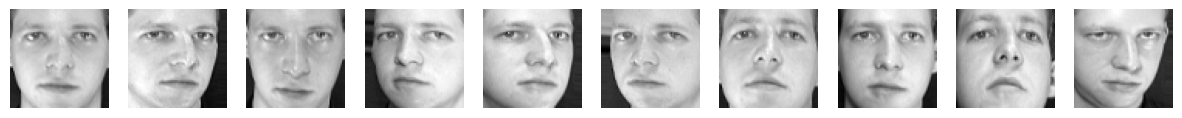

In [120]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Tải dữ liệu
data = fetch_olivetti_faces()
faces = data.images

# Hiển thị 10 tấm ảnh đầu tiên
fig, ax = plt.subplots(1, 10, figsize=(15, 1.5))
for i in range(10):
    ax[i].imshow(faces[i], cmap='gray')
    ax[i].axis('off')
plt.show()

- b) Dùng NMF để nén ảnh gốc còn 40 chiều. Giải thích ý nghĩa của các ma trận W
và H.

In [121]:
from sklearn.decomposition import NMF

# Định dạng lại dữ liệu thành ma trận (số lượng mẫu, số lượng features)
data_matrix = data.data

# Áp dụng NMF để giảm chiều dữ liệu xuống còn 40
nmf = NMF(n_components=40, init='random', random_state=30, max_iter=10000)
W = nmf.fit_transform(data_matrix)
H = nmf.components_

In [122]:
W.shape

(400, 40)

In [123]:
H.shape

(40, 4096)

#### **Ma trận W**
- **Kích thước**: (400, 40), với 400 là số lượng ảnh và 40 là số lượng thành phần mới sau khi giảm chiều.
- **Ý nghĩa**: Mỗi cột trong **W** có thể được coi như một "khuôn mặt cơ sở" hoặc một khía cạnh đặc trưng của khuôn mặt mà khi kết hợp các khía cạnh này có thể tái tạo được các ảnh gốc. Ví dụ, một cột có thể tập trung vào việc biểu diễn đặc điểm của mắt, cột khác có thể biểu diễn đặc điểm của miệng, và cứ thế các cột khác tập trung vào các đặc điểm khác nhau.

#### **Ma trận H**
- **Kích thước**: (40, 4096), với 40 là số lượng thành phần mới và 4096 (tức là 64x64) là số lượng pixel trong mỗi ảnh gốc.
- **Ý nghĩa**: **H** chứa các hệ số mà khi nhân với **W** giúp tái tạo lại các ảnh gốc. Mỗi hàng trong **H** chỉ ra cách mà mỗi "khuôn mặt cơ sở" từ **W** được trộn lẫn để tái tạo từng ảnh gốc trong không gian của 4096 pixel.



- c) Tái tạo lại dữ liệu và trực quan hoá 10 tấm ảnh đầu tiên sau khi tái tạo. Nhận xét.

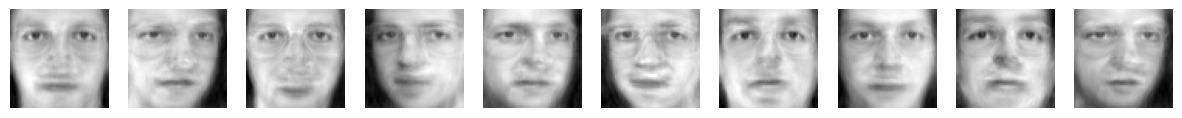

In [124]:
import numpy as np

# Tái tạo dữ liệu từ các thành phần
reconstructed_faces = np.dot(W, H)

# Hiển thị 10 tấm ảnh đầu tiên sau khi tái tạo
fig, ax = plt.subplots(1, 10, figsize=(15, 1.5))
for i in range(10):
    ax[i].imshow(reconstructed_faces[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')
plt.show()

#### Sau khi đã áp dụng NMF để tái tạo ảnh từ bộ dữ liệu Olivetti faces, có thể quan sát và nhận xét về các khía cạnh sau đây của ảnh tái tạo so với ảnh gốc:

**1. Độ Chính Xác của Ảnh Tái Tạo**
- Chi tiết: Các ảnh tái tạo thường mất một số chi tiết nhỏ, đặc biệt là những chi tiết phức tạp hoặc tinh tế hơn trong ảnh gốc. NMF cố gắng tóm tắt dữ liệu, do đó, các nét mặt rất tinh tế có thể không được bảo toàn hoàn hảo.
- Sự rõ nét: Các ảnh tái tạo có thể xuất hiện mờ hơn so với ảnh gốc do sự mất mát thông tin trong quá trình giảm chiều.

**2. Tính Tổng Quát của Thành Phần**
- Các khuôn mặt cơ sở: Các thành phần (khuôn mặt cơ sở) được NMF trích xuất có thể cung cấp cái nhìn sâu sắc về các đặc điểm chung nhất trong toàn bộ bộ dữ liệu. Ví dụ, nếu các khuôn mặt cơ sở chủ yếu là mặt nghiêm túc, điều này có thể phản ánh tính chất chung của bộ dữ liệu.
- Ứng dụng của thành phần: Thành phần có thể được sử dụng để phân tích hoặc phân loại ảnh dựa trên các đặc điểm đã học được, hỗ trợ trong các tác vụ như nhận dạng khuôn mặt hoặc phân loại cảm xúc.

**3. Hiệu Suất Tái Tạo**
- Sai số tái tạo: Đánh giá chất lượng của ảnh tái tạo bằng cách xem xét sai số giữa ảnh gốc và ảnh tái tạo. Sai số này có thể đo lường được và cung cấp thông tin quan trọng về hiệu suất của mô hình NMF.
- Thời gian xử lý và tài nguyên sử dụng: Hiệu quả của việc giảm chiều cũng có thể được đánh giá qua thời gian tính toán và tài nguyên hệ thống cần thiết để thực hiện phân tích và tái tạo.

**4. Ảnh hưởng của Số Thành Phần**
- Chọn số thành phần: Số lượng thành phần (k) trong NMF có thể ảnh hưởng lớn đến chất lượng của ảnh tái tạo. Việc chọn một giá trị k thấp quá mức có thể không đủ để bắt kịp đầy đủ các đặc điểm quan trọng của ảnh, trong khi một giá trị k quá cao có thể dẫn đến việc giảm hiệu quả nén và tăng độ phức tạp của mô hình.

### Trường hợp chỉ lấy 10 ảnh đầu tiên để làm bộ dữ liệu xử lý


In [125]:
# Định dạng lại dữ liệu thành ma trận (số lượng mẫu, số lượng features)
data_matrix = data.data[:10]

# Áp dụng NMF để giảm chiều dữ liệu xuống còn 40
nmf = NMF(n_components=40, init='random', random_state=30, max_iter=10000)
W = nmf.fit_transform(data_matrix)
H = nmf.components_

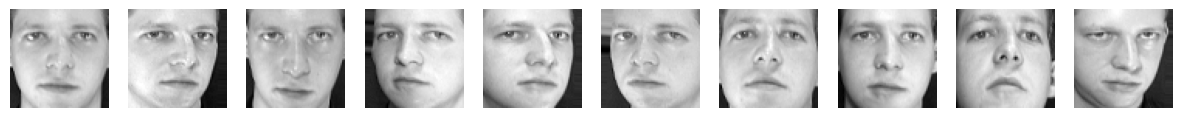

In [126]:
# Tái tạo dữ liệu từ các thành phần
reconstructed_faces = np.dot(W, H)

# Hiển thị 10 tấm ảnh đầu tiên sau khi tái tạo
fig, ax = plt.subplots(1, 10, figsize=(15, 1.5))
for i in range(10):
    ax[i].imshow(reconstructed_faces[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')
plt.show()

#### Khi sử dụng NMF (Non-negative Matrix Factorization), số lượng ảnh mà bạn chọn làm dữ liệu đầu vào có thể ảnh hưởng đến kết quả của quá trình giảm chiều và tái tạo dữ liệu vì các lý do sau:

**1. Đa dạng dữ liệu**
- Toàn bộ bộ dữ liệu (400 ảnh): Khi áp dụng NMF lên toàn bộ bộ dữ liệu gồm 400 ảnh, ta đang cung cấp một mức độ đa dạng cao của dữ liệu mẫu. NMF sẽ tìm cách tìm ra các thành phần (features) phổ biến nhất mà có thể mô tả hiệu quả nhất toàn bộ bộ dữ liệu. Các thành phần này có thể bao gồm nhiều chi tiết tổng quát của khuôn mặt, chẳng hạn như vị trí và hình dạng của mắt, mũi, miệng v.v...
- Chỉ 10 ảnh đầu tiên: Khi chỉ sử dụng 10 ảnh đầu tiên, phạm vi đặc điểm mà NMF có thể "học" sẽ bị hạn chế hơn nhiều. NMF trong trường hợp này sẽ tập trung vào việc tìm ra các thành phần phù hợp nhất để mô tả chỉ 10 khuôn mặt này. Điều này có thể dẫn đến việc "quá khớp" với những khuôn mặt đặc biệt này và không đại diện cho tổng thể khuôn mặt trong bộ dữ liệu lớn hơn.

**2. Chất lượng tái tạo**
- 400 ảnh: Khi sử dụng NMF trên nhiều ảnh, các "khuôn mặt cơ sở" được tạo ra có thể không hoàn hảo cho bất kỳ một ảnh nào riêng lẻ nhưng sẽ tốt cho việc mô tả tổng thể bộ dữ liệu. Điều này có thể làm giảm chất lượng tái tạo của từng ảnh cụ thể nhưng tăng khả năng tổng quát hóa.
- 10 ảnh: Với việc tập trung vào một tập hợp nhỏ, NMF có thể tạo ra các "khuôn mặt cơ sở" rất tốt cho việc tái tạo chính xác những ảnh này. Tuy nhiên, các thành phần này có thể không hiệu quả khi áp dụng cho các ảnh khác ngoài 10 ảnh đầu tiên.

**3. Sự ổn định và hội tụ**
- Bộ dữ liệu lớn: NMF có nhiều dữ liệu hơn để "học", điều này có thể giúp giải quyết ổn định hơn và hội tụ tốt hơn với ít rủi ro bị mắc kẹt ở các điểm cực tiểu địa phương không tốt.
- Bộ dữ liệu nhỏ: Việc giảm số lượng dữ liệu có thể làm cho NMF dễ bị ảnh hưởng bởi nhiễu hoặc các đặc điểm không đại diện, dẫn đến sự hội tụ kém hoặc không ổn định.

Do đó, kết quả của NMF thay đổi tùy theo số lượng ảnh được sử dụng là do sự thay đổi trong độ phức tạp và đa dạng của dữ liệu mà thuật toán phải làm việc.